In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn import linear_model
from sklearn import cross_decomposition
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
import matplotlib.font_manager as font_manager

In [5]:
data = np.genfromtxt('AGB_5bands_LIDAR2.csv', delimiter=",", skip_header=1, dtype=float)
datb = pd.read_csv('AGB_5bands_LIDAR2.csv', sep=',', dtype=float)
Y = data[:,0].reshape(-1, 1)
X = data[:,1:25]
#X_bandmeanheight = data[:,[2,3,4,5,6,9]]
#X_bands = data[:,2:7]
#X_height = data[:,6:12]
#X_intensity = data[:,7:9]
#X_density = data[:,17:21]
#X_z = data[:,21:25]
#X_BH = data[:, [2,3,4,5,6,9,10,11,12,13,14,15,16]]
#X_BH2 = data[:, [2,3,4,5,6,9]]
X_BHD = data[:, [1,2,3,4,5,6,7,8,9,11,12,14,16,17,18,19,20,21,22,23]]
X_new = data[:,[1,2,3,4,5,6,7,9,11,12,13,14,16,22,23]]
datb

,AGB (gDM m-2),# stems,B1,B2,B3,B4,B5,mean_intensity,std_intensity,mean_height (m),...,skew_height,kurto_height,dens_q100,dens_q75,dens_q50,dens_q25,mean_zdiff_q100,mean_zdiff_q75,mean_zdiff_q50,mean_zdiff_q25
0,1323.794060,95.0,570.905076,1574.087549,1232.941491,3778.467176,5875.328628,27.292035,0.772095,0.498920,...,-1.154370,1.081777,0.238938,0.256637,0.247788,0.256637,0.006462,0.001500,0.003037,0.012286
1,1181.513078,81.0,546.805955,1644.679096,1174.149204,3874.671569,6098.738751,26.937500,0.788095,0.545260,...,0.254661,0.058937,0.250000,0.250000,0.239583,0.260417,0.005130,0.001696,0.001955,0.004625
2,1396.620480,72.0,911.963536,2588.430658,1923.934329,5790.963404,8696.627488,29.062112,1.983439,0.610696,...,-1.653706,2.889308,0.242236,0.254658,0.248447,0.254658,0.002263,0.001300,0.001385,0.010950
3,1070.987250,70.0,853.321177,2491.131402,1687.532855,5510.875903,8869.561787,28.984375,1.772112,0.680016,...,-0.441761,0.228470,0.234375,0.265625,0.250000,0.250000,0.003103,0.000939,0.001161,0.004516
4,1705.515871,106.0,450.784141,1412.891813,1043.949519,3312.013907,7327.495616,30.091603,2.194547,0.624321,...,-0.932149,3.212323,0.244275,0.251908,0.236641,0.267176,0.002613,0.000906,0.001067,0.006618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,135.885714,0.0,1305.600330,3719.827093,1352.133915,7566.600449,17763.998880,30.120301,1.712570,0.169416,...,0.172939,-0.846193,0.246364,0.247273,0.253636,0.252727,0.000352,0.000118,0.000129,0.000462
99,72.736842,0.0,1845.526187,4411.236701,1941.012845,8501.802606,17354.290570,30.679054,1.573117,0.142003,...,0.427786,-0.290989,0.250412,0.247117,0.252059,0.250412,0.000464,0.000195,0.000178,0.000868
100,105.764706,0.0,1902.662617,4492.935334,2075.974571,8538.844587,17341.973720,30.777108,1.752370,0.107624,...,0.166476,-0.523210,0.249383,0.241975,0.258025,0.250617,0.006194,0.000164,0.000226,0.000530
101,130.000000,0.0,1799.573348,4159.106602,1780.852945,8520.853529,19201.028550,30.575916,1.859811,0.124176,...,0.500619,-0.801314,0.243140,0.250762,0.256098,0.250000,0.000305,0.000094,0.000131,0.000352


In [7]:
#PCA analysis
scaler = StandardScaler()
scaler.fit(X_BHD)
X_BHD=scaler.transform(X_BHD)  
pca = PCA()
pcaResult = pca.fit_transform(X_BHD)
#print("PCA decomposition:")
#print(pca.components_)
print("Top-3 Most important components are:")
print(np.abs(pca.components_))
print("Explained_variance_ratio_:")
print(pca.explained_variance_ratio_)

Top-3 Most important components are:
[[1.27228786e-01 3.93963204e-01 4.21499731e-01 3.87012134e-01
  4.22139822e-01 3.92705572e-01 1.98788221e-02 3.09649947e-02
  6.40394918e-02 6.11095270e-02 3.52952220e-02 1.79932173e-01
  5.43568108e-03 1.13436882e-01 8.25889904e-02 8.60217543e-02
  8.77803365e-02 1.05731917e-01 1.70936287e-01 2.25195368e-01]
 [1.23482970e-01 1.02962605e-01 1.18702256e-01 1.52251255e-01
  1.19795733e-01 1.09083564e-02 2.67262593e-01 2.45452496e-01
  1.72384547e-01 1.77128301e-01 1.96846271e-01 1.42165522e-01
  1.11511233e-01 9.00130141e-02 4.23018339e-01 4.14132935e-01
  4.20890831e-01 9.47502444e-02 2.38820712e-01 2.37768090e-01]
 [8.13952612e-03 1.06742259e-01 1.19821502e-01 1.13893308e-01
  1.11331752e-01 3.65152907e-02 1.35959347e-01 5.91784072e-02
  5.17440371e-01 5.15971481e-01 5.05938981e-01 8.79108509e-02
  1.01370144e-01 2.48324997e-02 1.79422317e-01 1.93827110e-01
  1.73866403e-01 4.02895563e-02 1.12359323e-01 5.18735210e-02]
 [3.70773175e-01 1.71127084e-0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2, random_state=1)
y_train = np.ravel(y_train.T)
y_test = np.ravel(y_test.T)
#X_test = X_test.T
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)
#Y = np.ravel(Y.T)

In [9]:
#Residual plotting function
def plotResult(residual, y_pred, string):
    fig, ax = plt.subplots()
    ymin = min(y_pred)
    ymax = max(y_pred)
    ax.scatter(y_pred, residual, alpha=0.7)
    ax.hlines(0, ymin, ymax, alpha=0.7, color='orange')
    ax.set_xlabel('AGB')
    ax.set_ylabel('Residual')
    fig.show()
    fig.savefig(string, dpi=300)

In [10]:
classifiers = [
    make_pipeline(StandardScaler(), svm.SVR(kernel='linear')),
    make_pipeline(StandardScaler(), linear_model.SGDRegressor(max_iter=1000, tol=1e-3)),
    make_pipeline(StandardScaler(), linear_model.BayesianRidge()),
    make_pipeline(StandardScaler(), cross_decomposition.PLSRegression(n_components=1)),
    make_pipeline(StandardScaler(), linear_model.LinearRegression()),
    make_pipeline(StandardScaler(), RandomForestRegressor())]

In [11]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])
RMSE: 334.13794959135123
Train r2 =  0.2523385663177875 

Test r2 =  0.41087448037196783 



<ipython-input-9-61a906b0e345>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-61a906b0e345>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])
RMSE: 205.41747487544257
Train r2 =  0.540398530646998 

Test r2 =  0.7773457435656053 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bayesianridge', BayesianRidge())])
RMSE: 172.91783137115613
Train r2 =  0.5232162500054516 

Test r2 =  0.8422258715583562 



<ipython-input-9-61a906b0e345>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-61a906b0e345>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
RMSE: 374.5961781065203
Train r2 =  0.5550817313392659 

Test r2 =  0.259571863949696 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])
RMSE: 257.72974073276913
Train r2 =  0.9245264231808414 

Test r2 =  0.6495021946002302 



<ipython-input-9-61a906b0e345>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


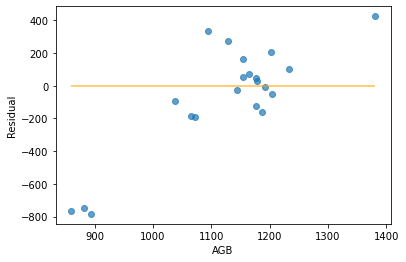

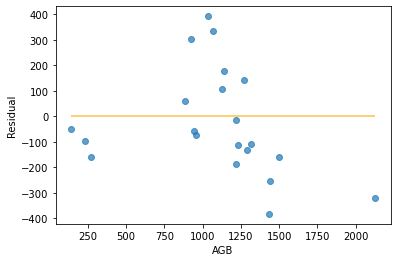

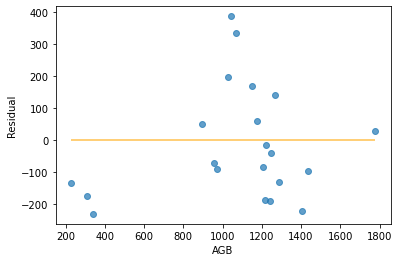

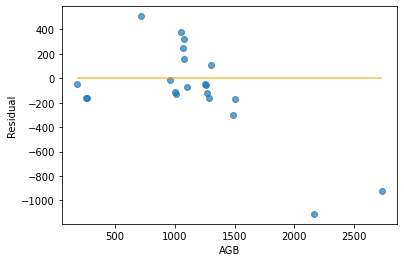

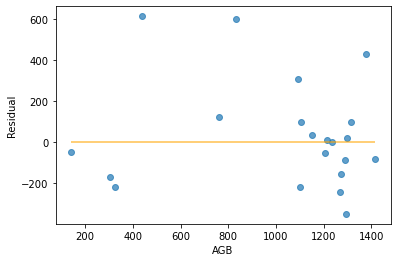

In [16]:
x = 0
for item in classifiers:
    print(item)
    x = x+1
    clf = item
    string = 'AGB' + str(x)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #scores = cross_val_score(clf, X_bandmeanheight, Y, cv=cv)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    residual = y_test-y_pred
    print('Train r2 = ', clf.score(X_train, y_train),'\n')
    print('Test r2 = ', clf.score(X_test, y_test),'\n')
    plotResult(residual, y_pred, string)

In [2]:
SVRparam = {'C': [1, 10, 100, 1000, 10000, 0.1, 0.01, 0.001, 0.0001], 'epsilon':[1.0, 0.1, 0.01, 0.001, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
SGDparam = {'loss': ['squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'], 'alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001], 'max_iter': [10, 100, 1000, 10000], 'epsilon': [1, 0.1, 0.001, 0.0001,0.00001], 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}
BRparam = {'n_iter': [100, 200, 300, 400, 500], 'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001], 'alpha_1': [1e-03, 1e-04, 1e-06, 1e-07, 1e-08], 'alpha_2': [1e-03, 1e-04, 1e-06, 1e-07, 1e-08], 'lambda_1': [1e-03, 1e-04, 1e-06, 1e-07, 1e-08], 'lambda_2': [1e-03, 1e-04, 1e-06, 1e-07, 1e-08]}
PLSparam = {'n_components': [1, 2, 3, 4, 5], 'scale': [True, False], 'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900]}
RFparam = {'n_estimators': [10, 100, 200, 300, 400, 500], 'min_samples_split': [1.0, 2.0, 3.0, 4.0], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': ['True', 'False'], 'oob_score': ['True', 'False']}

NameError: name 'DotProduct' is not defined

In [3]:
GSRegressors = [make_pipeline(StandardScaler(), GridSearchCV(SVR(), SVRparam, cv=5, n_jobs = -1, verbose=0, refit=True)),
                make_pipeline(StandardScaler(), GridSearchCV(linear_model.SGDRegressor(), SGDparam, cv=5, n_jobs = -1, verbose=0, refit=True)),
                make_pipeline(StandardScaler(), GridSearchCV(linear_model.BayesianRidge(), BRparam, cv=5, n_jobs = -1, verbose=0, refit=True)),
                make_pipeline(StandardScaler(), GridSearchCV(cross_decomposition.PLSRegression(), PLSparam, cv=5, n_jobs = -1, verbose=0, refit=True)),
                make_pipeline(StandardScaler(), GridSearchCV(RandomForestRegressor(), RFparam, cv=5, n_jobs = -1, verbose=0, refit=True))]

        

NameError: name 'make_pipeline' is not defined

In [79]:
for item in GSRegressors:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('r2 = ', clf.score(X_test, y_test),'\n')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                              param_grid={'C': [1, 10, 100, 1000, 10000, 0.1,
                                                0.01, 0.001, 0.0001],
                                          'epsilon': [1.0, 0.1, 0.01, 0.001,
                                                      10],
                                          'kernel': ['linear', 'rbf', 'poly',
                                                     'sigmoid']}))])
RMSE: 257.5604403561732
r2 =  0.6499625211462923 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
                              param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001,
                                                    1e-05],
                                          'epsilon': [1, 0.1, 0.001, 

C:\Users\renea\anaconda3\envs\new_env\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Training r2 =  0.9211645214905728 

Testing r2 =  0.6179478518758492 

[2,3,4,5,6,7,9,10,12,13,14,16,22,23


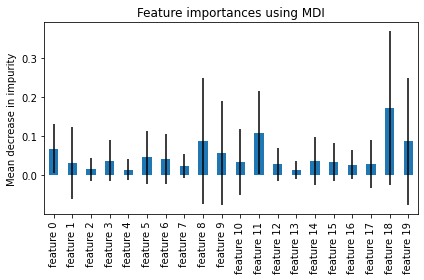

In [50]:
#RFparam = {'n_estimators': [10, 100, 200, 300, 400, 500], 'max_depth': [5, 10, 50, 100, 200, 300, 400, 500, 1000],
#       'min_samples_split': [1.0, 2.0, 3.0, 4.0], 'max_features': [2,3,4,5,6,7,8,9,10]}

clf = RandomForestRegressor().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Training r2 = ', clf.score(X_train, y_train),'\n')
print('Testing r2 = ', clf.score(X_test, y_test),'\n')
feature_names = [f'feature {i}' for i in range(X_BHD.shape[1])]
importances = clf.feature_importances_
print('[2,3,4,5,6,7,9,10,12,13,14,16,22,23')
std = np.std([
    tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('AGB_RF_import.png', dpi=300)

In [53]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

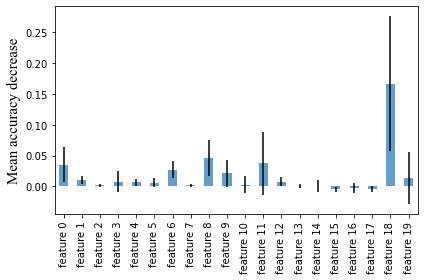

In [54]:
fig, ax = plt.subplots()
axisFont = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=15)
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, alpha=0.7)
ax.set_ylabel("Mean accuracy decrease", fontproperties=axisFont)
fig.tight_layout()
fig.savefig('RF_perm.png', dpi=350)
plt.show()